## Dependencies

In [1]:
# Dataset handling library
import pandas as pd

# Data Splitting Module
from sklearn.model_selection import train_test_split

# PCA Module
from sklearn.decomposition import PCA

# LDA Module
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Plot Library
from matplotlib import pyplot as plt

# SVM Classifier
from sklearn import svm

# random Seed for sklearn Splitting module(b/w [0,42])
random_seed = None

## Merging All the 3 datasets obtained from the website

In [2]:
df1 = pd.read_csv("occupancy_dataset/datatraining.txt", index_col = 0)
df2 = pd.read_csv("occupancy_dataset/datatest.txt", index_col = 0)
df3 = pd.read_csv("occupancy_dataset/datatest2.txt", index_col = 0)

df = pd.concat([df1,df2,df3], axis = 0)

In [3]:
df = df.sort_values(by = 'date')
df.reset_index(drop=True, inplace=True)

## Reading the merged dataset

In [4]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
print(f'Shape of dataframe: {df.shape}')
df.describe()

Shape of dataframe: (20560, 7)


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


In [6]:
# Number of null values in each column
df.isna().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [7]:
# Number of unique values in each column
df.nunique()

date             20560
Temperature        485
Humidity          2480
Light             1905
CO2               5167
HumidityRatio     9686
Occupancy            2
dtype: int64

## Splitting the dataset and Applying PCA
### Question 1,2

In [8]:
X, y = df.iloc[:,1:-1], df.iloc[:,-1]
X.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
0,23.7000,26.272,585.200000,749.200000,0.004764
1,23.7180,26.290,578.400000,760.400000,0.004773
2,23.7300,26.230,572.666667,769.666667,0.004765
3,23.7225,26.125,493.750000,774.750000,0.004744
4,23.7540,26.200,488.600000,779.000000,0.004767


In [9]:

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC_1', 'PC_2'])

In [10]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,PC_1,PC_2,Occupancy
0,238.924731,390.999784,1
1,246.376573,380.222846,1
2,252.498093,371.208907,1
3,224.946477,297.085521,1
4,226.726255,290.649570,1


In [11]:
X, y = finalDf.iloc[:,:-1], finalDf.iloc[:,-1]

In [12]:
# First we split the {dataset} into {train, test+valid}   <== [70:30]
X_train, X_test_valid, y_train, y_test_valid = train_test_split(
        X, y, test_size=0.30, random_state=random_seed)

In [13]:
# Then we split the {test+valid} set into {test, valid} <== [20:10]
X_valid, X_test, y_valid, y_test = train_test_split(
        X_test_valid, y_test_valid, test_size=0.67, random_state=random_seed)

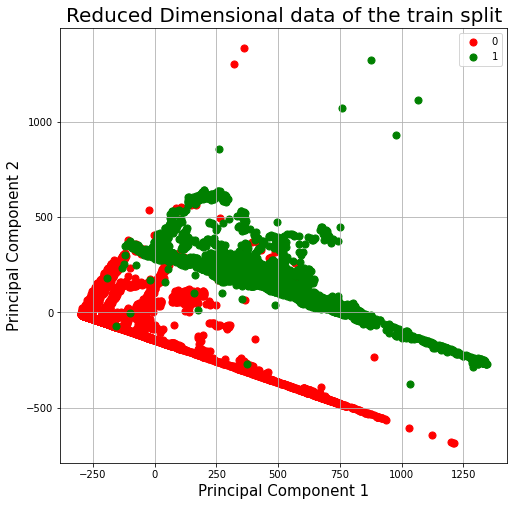

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Reduced Dimensional data of the train split', fontsize = 20)

targets = y_train.unique()
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = [row_idx for row_idx, row in enumerate(y_train[:]) if row == target]
    ax.scatter(X_train.iloc[indicesToKeep, 0]
               , X_train.iloc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [15]:
print(len(X_train))

14392


### Question 3

In [16]:
hyperparams = {
    "kernel":"linear",
}

In [17]:
# Laptop fat jayega, abhi toh nahi chalaya
# Towardsdatascience and other blogs zindabad


def get_svm_classifier(hyperparams,X_train,y_train):
    """
    Params:
    -------
    hyperparams: hyperparameters for SVM Classifier
    X_train: Train Data
    y_train: Train Labels/Output Classes

    Returns:
    --------
    sklearn.svm.SVC(...) : Returns the classifier
    
    Description:
    --------------
    Create a svm Classifier and return it
    """   
    clf = svm.SVC(kernel=hyperparams["kernel"]) # Kernel function obtained from hyperparameters

    #Train the model using the training sets
    clf.fit(X_train, y_train)
    
    return clf

def get_accuracy(clf, X_actual, y_actual):
    """
    Params:
    -------
    clf: svm classifier
    X_actual: Actual Data
    y_actual: Actual Labels/Output Classes

    Returns:
    --------
    Returns the accuracy
    """
    #Predict the response for actual dataset
    y_pred = clf.predict(X_actual)
   
    # Model Accuracy: how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_actual, y_pred)
    
    return accuracy

#### Various Kernels

In [18]:
def explore_kernels(hyperparams,X_valid,y_valid):
    """
    Explores various Kernels and returns best classifier
    """

    kernels = ['linear', 'poly', 'rbf', 'sigmoid']

    best_clf = None
    best_accuracy = 0.0

    print("+-----------------------------------------------+")
    print("|         Kernel        |        Accuracy       |")
    print("+-----------------------------------------------+")

    for kernel in kernels:
        hyperparams["kernel"] = kernel

        # Get the svm Classifier
        clf = get_svm_classifier(hyperparams,X_valid,y_valid)

        accuracy = get_accuracy(clf, X_valid, y_valid)

        if accuracy > best_accuracy:
            best_clf = clf
            best_accuracy = accuracy

        print(f"|{kernel.center(23)}|{str(accuracy).center(23)}|")
        print("+-----------------------------------------------+")
        
    return best_clf

In [19]:
best_clf = explore_kernels(hyperparams,X_valid,y_valid)

+-----------------------------------------------+
|         Kernel        |        Accuracy       |
+-----------------------------------------------+
|         linear        |   0.9882063882063882  |
+-----------------------------------------------+
|          poly         |   0.9891891891891892  |
+-----------------------------------------------+
|          rbf          |   0.9886977886977887  |
+-----------------------------------------------+
|        sigmoid        |   0.8565110565110565  |
+-----------------------------------------------+


In [20]:
test_accuracy = get_accuracy(best_clf, X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9874183401887249


#### Question 4

In [21]:
X, y = df.iloc[:,1:-1], df.iloc[:,-1]
X.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
0,23.7000,26.272,585.200000,749.200000,0.004764
1,23.7180,26.290,578.400000,760.400000,0.004773
2,23.7300,26.230,572.666667,769.666667,0.004765
3,23.7225,26.125,493.750000,774.750000,0.004744
4,23.7540,26.200,488.600000,779.000000,0.004767


In [22]:
lda = LDA(n_components=1)
lda_obj = lda.fit_transform(X, y)

analyzedDf = pd.DataFrame(data = lda_obj
             , columns = ['LD_1'])

In [23]:
finalDf = pd.concat([analyzedDf, y], axis = 1)
finalDf.head()

,LD_1,Occupancy
0,5.168225,1
1,5.084222,1
2,4.998443,1
3,3.897885,1
4,3.838313,1


In [24]:
X, y = finalDf.iloc[:,:-1], finalDf.iloc[:,-1]

In [25]:
# First we split the {dataset} into {train, test+valid}   <== [70:30]
X_train, X_test_valid, y_train, y_test_valid = train_test_split(
        X, y, test_size=0.30, random_state=random_seed)

In [26]:
# Then we split the {test+valid} set into {test, valid} <== [20:10]
X_valid, X_test, y_valid, y_test = train_test_split(
        X_test_valid, y_test_valid, test_size=0.67, random_state=random_seed)

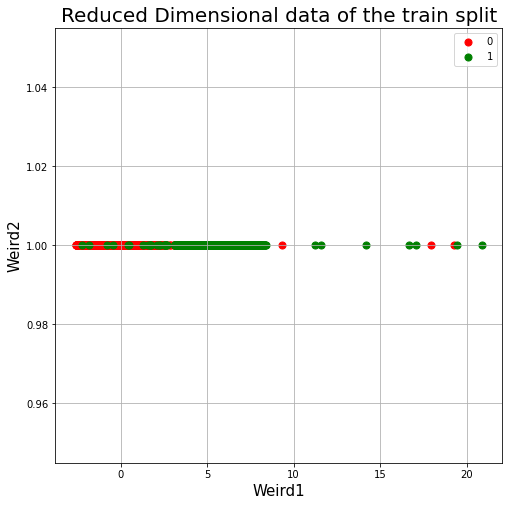

In [66]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Weird1', fontsize = 15)
ax.set_ylabel('Weird2', fontsize = 15)
ax.set_title('Reduced Dimensional data of the train split', fontsize = 20)

targets = y_train.unique()
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = [row_idx for row_idx, row in enumerate(y_train[:]) if row == target]
    ax.scatter(X_train[y_train == target]
               , [1]*len(X_train[y_train == target])
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

No handles with labels found to put in legend.


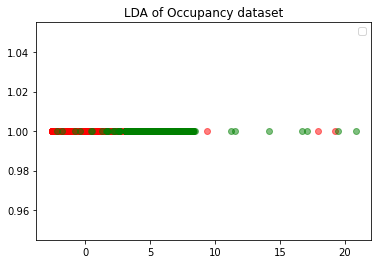

In [67]:
colors = ['red','green']
targets = y_train.unique()
for color, target in zip(colors, targets):
    plt.scatter(
        X_train[y_train == target], [1]*len(y_train[y_train == target]), alpha=0.5, color=color
    )
plt.legend(loc="best", shadow=False, scatterpoints=100)
plt.title("LDA of Occupancy dataset")

plt.show()

In [43]:
best_clf = explore_kernels(hyperparams,X_valid,y_valid)

+-----------------------------------------------+
|         Kernel        |        Accuracy       |
+-----------------------------------------------+
|         linear        |   0.9882063882063882  |
+-----------------------------------------------+
|          poly         |   0.9896805896805897  |
+-----------------------------------------------+
|          rbf          |   0.9882063882063882  |
+-----------------------------------------------+
|        sigmoid        |   0.9891891891891892  |
+-----------------------------------------------+


In [44]:
test_accuracy = get_accuracy(best_clf, X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9891120251633196


- Seed 0,39,29 => slight improvement
- Good improvements came once when passed None
- Compulsorily add shuffle=True so that TA understands shuffling is happening
